# Examen Módulo 2 - Montecarlo - 3.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

---
### Integración Montecarlo tipo 1 <font size='1'>(25 puntos)</font>

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{xe^{-x^3}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b-a)

2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [5]:
def f(x):
    return (np.log(2+np.sin(2*x**2)))/(x*np.exp(-(x**3)))

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

In [6]:
N=np.logspace(3,6,4) #de 3 ceros a 6 ceros 4 terminos
table=pd.DataFrame(index=N,columns=["(0.1, 0.3)","(0.3, 0.5)","(0.5, 0.7)","(0.7, 0.9)","(0.9, 1.1)"])
for i in N:
    table.loc[i, "(0.1, 0.3)"] = montecarlo(f, int(i), 0.1, 0.3)
    table.loc[i, "(0.3, 0.5)"] = montecarlo(f, int(i), 0.3, 0.5)
    table.loc[i, "(0.5, 0.7)"] = montecarlo(f, int(i), 0.5, 0.7)
    table.loc[i, "(0.7, 0.9)"] = montecarlo(f, int(i), 0.7, 0.9)
    table.loc[i, "(0.9, 1.1)"] = montecarlo(f, int(i), 0.9, 1.1)
from IPython.display import HTML, display_html, display
display(HTML('<h2> Aproximaciones </h2>'))
display_html(table)

,"(0.1, 0.3)","(0.3, 0.5)","(0.5, 0.7)","(0.7, 0.9)","(0.9, 1.1)"
1000.0,0.805741,0.454006,0.408268,0.455878,0.580149
10000.0,0.806123,0.455367,0.408105,0.455795,0.582712
100000.0,0.807924,0.455548,0.408163,0.4557,0.583482
1000000.0,0.807237,0.455554,0.408142,0.455721,0.583659


4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

In [13]:
h = table.iloc[3].tolist()

In [15]:
soluciones = [0.1]
for i in h:
    soluciones.append(soluciones[-1]+i)

imp = 0.1
for i in soluciones:
    print("y(", imp, ") = ", i)
    imp += 0.2
    imp = round(imp, 1)

y( 0.1 ) =  0.1
y( 0.3 ) =  0.9072365716382469
y( 0.5 ) =  1.362790694369949
y( 0.7 ) =  1.7709323235688788
y( 0.9 ) =  2.2266529540020312
y( 1.1 ) =  2.8103122499604325


---
### Integración Montecarlo tipo 2 <font size='1'>(25 puntos)</font>
Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def montecarlo2(x,y):
    return (np.exp(-0.05*(x**2+y**2)))*(np.sin(x**2 + y**2)) > (0.5)

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

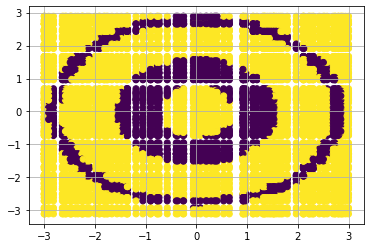

In [6]:
x = np.random.uniform(-3,3,100)
y = np.random.uniform(-3.2,3,100)
X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X,Y,c=~montecarlo2(X,Y))
plt.grid()

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [7]:
N=np.logspace(4,6,3)
N

array([  10000.,  100000., 1000000.])

In [8]:
def montecarlo(region, a1, b1, a2, b2, N) :
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    B = region(x,y)
    AR = (b1-a1)*(b2-a2)
    return np.mean(B)*AR
table = pd.DataFrame(columns = ["Aproximación","Error relativo"], index = N)
for i in N:
    table.loc[i,"Aproximación"]= montecarlo(montecarlo2,-3,3,-3.2,3,int(i))
    
ax = -3
bx = 3
ay = -3.2
by = 3

AR = (bx-ax)*(by-ay)
for i in N:
    AD = table["Aproximación"][i]
    z= np.sqrt((1-(AD/AR))/(AD/AR))
    table["Error relativo"][i] = z
    
table

,Aproximación,Error relativo
10000.0,11.07072,1.536299
100000.0,10.933824,1.549931
1000000.0,10.89149,1.554191


---
### Generación de fractales <font size='1'>(25 puntos)</font>

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un helecho tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

In [40]:
import numpy as np

A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

A = [A0, A1, A2, A3]
b = [b0, b1, b2, b3]

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

In [44]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
random.seed(100)

x = [0]
y = [0]
z = [0]
i = np.arange(4)

for k in range(10**5):
    i_actual = random.choices(i)[0]
    
    A_actual = A[i_actual]
    b_actual = b[i_actual]
    

    xkm1 = A_actual[0][0]*x[-1] + A_actual[0][1]*y[-1] + A_actual[0][2]*z[-1] + b_actual[0]
    ykm1 = A_actual[1][0]*x[-1] + A_actual[1][1]*y[-1] + A_actual[1][2]*z[-1] + b_actual[1]
    zkm1 = A_actual[2][0]*x[-1] + A_actual[2][1]*y[-1] + A_actual[2][2]*z[-1] + b_actual[2]

    x.append(xkm1)
    y.append(ykm1)
    z.append(zkm1)

/var/folders/mq/f6xbcpqd1bn7g2yf1nb41pq40000gn/T/ipykernel_18975/4263452365.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


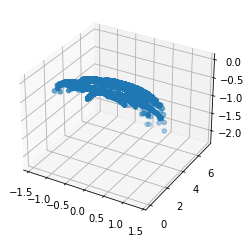

In [45]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)

---
### Probabilidad Precio-Umbral <font size='1'>(25 puntos)</font>

Suponga que desea invertir en **Tesla** o **Google**. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 5 de noviembre del presente año.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *pandas-datareader*, donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [10]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

def getClose(name, start, end):
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

2. Obtenga los precios de cierre ajustados para TSLA Y GOOGL Libre desde el 31 de octubre de 2020 al 31 de octubre de 2022.

In [11]:
names = ["TSLA", "GOOGL"]
data = getClose(names, "2020-10-31", "2022-10-31")
data

Symbols,TSLA,GOOGL
Date,,
2020-11-02,133.503326,81.216003
2020-11-03,141.300003,82.282997
2020-11-04,140.326660,87.292503
2020-11-05,146.029999,88.125000
2020-11-06,143.316666,87.986504
...,...,...
2022-10-25,222.419998,104.480003
2022-10-26,224.639999,94.930000
2022-10-27,225.089996,92.220001


3. Calcule el rendimiento **simple** para ambas empresas.

In [12]:
data.shift()
R = (data- data.shift())/(data.shift())
R.describe()

Symbols,TSLA,GOOGL
count,502.000000,502.000000
mean,0.001778,0.000492
std,0.037931,0.019521
min,-0.121841,-0.091405
25%,-0.019489,-0.009435
50%,0.002001,0.000920
75%,0.022117,0.010386
max,0.196412,0.076557


4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

In [13]:
from datetime import datetime, timedelta
def sim_r(media, std, inicio, final, N) :
    fi=inicio
    ff=final
    fechai = datetime.strptime(fi, "%Y-%m-%d")
    fechaf = datetime.strptime(ff, "%Y-%m-%d")
    dias = (fechaf - fechai) / timedelta(days=1)
    fechas=pd.date_range(inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=np.random.normal(media,std,(int(dias),N)))

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de octubre de 2022 al 5 de febrero de 2023.

In [14]:
data1= getClose("TSLA", "2020-10-31", "2022-10-31")
R1 = (data1- data1.shift())/(data1.shift())
sim_r(R1.mean(), R1.std(), "2022-10-31","2023-02-05",100000)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-10-31,0.014797,-0.007998,0.047490,0.052793,-0.015952,-0.028673,0.009491,0.039748,-0.038101,0.000381,...,-0.008623,0.023605,0.064747,-0.002378,0.036804,0.005753,0.029876,-0.010275,-0.028378,-0.030799
2022-11-01,0.039296,-0.043838,0.015382,0.011983,0.011633,-0.034241,0.052987,-0.037192,-0.028744,0.016520,...,0.036374,-0.012508,0.021959,-0.014230,0.068720,-0.004175,0.000565,0.021160,-0.014883,-0.027696
2022-11-02,-0.027732,0.040813,-0.043808,0.047271,0.060708,-0.011101,-0.087526,-0.018122,0.022527,0.057037,...,0.015932,0.000904,0.011032,-0.065503,0.017465,0.057377,-0.026440,0.015546,-0.002760,0.007376
2022-11-03,-0.000844,-0.011280,0.019655,0.059768,-0.006761,-0.088714,-0.016938,0.046912,-0.058434,-0.015881,...,-0.039662,0.002918,0.016702,-0.012017,0.034853,0.048978,0.016366,0.023425,0.022968,-0.019082
2022-11-04,-0.017705,0.056034,-0.063392,0.000146,0.049943,-0.027594,-0.028232,0.037925,0.002720,0.001021,...,0.008972,0.063977,-0.059748,0.056723,0.020636,0.011183,-0.000026,-0.065849,-0.052904,0.048967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.040843,-0.014395,0.015669,0.051587,0.107363,-0.001534,0.003392,-0.039217,-0.022029,-0.086389,...,-0.006726,-0.009100,0.013886,0.019862,-0.010038,-0.023830,0.007233,-0.026839,-0.069168,0.047866
2023-02-01,-0.013536,0.012532,-0.015089,0.109398,0.013760,0.037346,-0.015939,0.011371,0.024523,0.009320,...,0.055431,-0.020518,-0.027440,0.048456,0.030322,0.090693,0.076934,0.030960,0.025648,0.112821
2023-02-02,0.008959,0.026119,-0.003768,-0.056831,0.032379,0.017098,-0.056079,-0.026689,-0.054278,-0.012612,...,-0.039093,-0.044235,-0.005110,0.005982,-0.028101,0.009460,-0.054387,0.036478,0.102022,-0.031697
2023-02-03,-0.043830,0.028602,-0.020091,0.015518,0.080542,0.017197,0.049376,0.006035,0.044560,0.062488,...,0.000724,0.028296,0.000109,-0.067496,0.027429,-0.054990,0.081646,0.017155,-0.017753,-0.023343


In [15]:
data2= getClose("GOOGL", "2020-10-31", "2022-10-31")
R2 = (data2- data2.shift())/(data2.shift())
sim_r(R2.mean(), R2.std(), "2022-10-31","2023-02-05",100000)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-10-31,0.004515,-0.009584,0.001358,0.033596,0.001466,0.029656,-0.012844,0.019822,-0.015022,0.025102,...,0.002364,0.023260,-0.004332,-0.005554,0.006672,-0.009304,-0.028728,-0.025784,0.002356,0.003249
2022-11-01,0.016474,0.042226,0.009510,-0.036808,-0.020096,-0.009164,0.009963,-0.003104,0.003828,-0.027087,...,-0.030698,0.007042,-0.020506,-0.005614,0.001568,0.041856,-0.011772,-0.039945,0.011587,-0.027910
2022-11-02,-0.010166,0.018841,0.001157,0.000992,-0.001207,0.012080,-0.039837,0.018686,-0.018413,0.007596,...,0.018681,-0.006249,-0.006424,-0.024474,0.007493,0.012676,-0.001709,0.017628,0.019413,-0.005054
2022-11-03,-0.011925,0.054266,0.013125,0.024699,0.003289,0.001644,0.008128,-0.012934,-0.019180,0.013381,...,-0.022285,0.027136,0.037214,0.027649,-0.016445,0.028950,-0.008971,0.005372,-0.001272,0.007311
2022-11-04,-0.042882,-0.041730,-0.024473,-0.015929,-0.028090,-0.033965,-0.010644,0.005287,-0.012134,-0.026209,...,0.043293,0.020906,-0.021547,0.001104,0.006929,0.019591,0.033660,0.011941,0.047589,-0.003035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.002405,-0.045962,-0.001628,0.029504,0.004336,-0.030664,0.028161,-0.007056,-0.009739,0.007727,...,-0.022057,-0.006085,-0.015301,-0.004245,0.013548,-0.012075,-0.022627,0.005763,0.000331,0.008060
2023-02-01,0.023709,0.005812,-0.007307,0.006170,-0.016868,-0.011459,0.007973,0.023372,-0.018734,0.007215,...,-0.045482,-0.009752,0.022588,0.012469,0.012827,0.012562,-0.011016,-0.011336,0.002369,-0.011030
2023-02-02,-0.023437,-0.013242,-0.035760,0.007204,0.041138,0.028219,0.030453,0.028096,-0.010320,0.008790,...,0.032060,-0.008398,-0.002555,0.011317,0.010890,-0.025661,0.014433,-0.007029,-0.008394,-0.006447
2023-02-03,0.023946,-0.025484,-0.003148,0.006559,0.015619,-0.045459,-0.015367,-0.002188,-0.020596,0.018471,...,-0.038672,0.028023,-0.019237,0.029295,-0.013474,-0.013260,0.007134,-0.010643,-0.027462,-0.020307


6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

In [16]:
R1 = np.log(data1/data1.shift()).dropna()
media_tsla = R1.mean()
std_tsla = R1.std()

r_simulados1= sim_r(media_tsla, std_tsla, "2022-10-05","2023-02-05", 1000)
a=(1+r_simulados1).cumprod()*data1[-1]
a

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2022-10-05,231.721040,225.832944,222.010880,225.315566,222.405476,228.322127,221.404556,215.951698,218.700902,225.744003,...,232.186789,220.755409,213.287814,224.296288,227.158579,221.457676,234.006351,228.173122,212.459844,222.696052
2022-10-06,227.128719,233.951496,224.711615,223.495203,217.659311,220.116383,217.089026,207.398633,216.191767,218.141615,...,215.874108,229.745826,215.229416,225.255543,227.325593,225.905189,234.681565,232.540069,212.863592,227.617199
2022-10-07,222.577542,227.102175,235.222356,225.000426,221.702087,220.361033,206.628279,219.720701,228.749680,221.334799,...,217.527849,214.185292,226.645948,235.578219,216.007174,217.740090,226.040633,233.424870,210.379983,231.484618
2022-10-08,225.970498,217.274648,251.676697,230.201318,228.901945,212.560379,201.902104,209.796329,226.914356,222.128901,...,217.667735,202.298685,227.301244,219.709825,205.022861,215.529777,230.154142,229.227116,205.025829,213.889054
2022-10-09,223.126043,221.530363,251.528306,224.941132,230.316862,210.473810,201.478232,196.564414,228.893855,221.259889,...,204.226355,198.434352,208.767700,227.301665,214.533954,224.351530,234.321690,223.270693,213.831602,209.760001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,177.637760,432.727667,71.732767,208.656633,197.054723,161.947610,280.144773,205.250961,177.488889,438.337010,...,455.747740,171.073003,168.005775,258.348324,109.260764,184.268774,353.498135,295.227894,287.149814,218.336986
2023-02-01,172.411047,419.978242,70.180243,221.255700,196.585371,159.762558,282.852009,209.920788,193.255325,453.899814,...,467.088471,164.582148,166.982743,265.080694,111.422762,179.142096,365.722506,310.240055,297.855875,225.254764
2023-02-02,173.274500,413.932360,66.600247,213.112400,200.132291,156.252425,286.433484,203.920977,185.401122,455.268382,...,446.164056,170.997640,171.396796,259.015288,118.114451,177.979004,365.902957,312.067636,307.041133,228.027174
2023-02-03,174.003953,385.704617,67.818486,209.327499,188.552899,154.857178,274.471898,218.798569,192.347859,482.422024,...,435.919955,174.086146,175.427750,253.690573,120.295753,183.153163,373.112608,310.572428,305.660894,221.583678


In [17]:
R2 = np.log(data2/data2.shift()).dropna()
media_googl = R2.mean()
std_googl = R2.std()

r_simulados2= sim_r(media_googl, std_googl, "2022-10-05","2023-02-05", 1000)
b=(1+r_simulados2).cumprod()*data2[-1]
b

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2022-10-05,93.783337,92.089038,96.164256,93.059317,92.128513,93.819740,93.408142,93.452070,93.847176,94.567641,...,92.564785,97.006816,92.017802,92.561120,92.950114,89.663236,98.205897,95.516662,94.903104,93.512401
2022-10-06,95.826609,92.379073,94.052146,95.103071,90.783553,93.683312,91.389078,95.262021,94.518528,91.267869,...,95.696763,95.929460,89.710605,93.394636,92.326723,91.327807,97.160634,92.262419,97.714039,90.370270
2022-10-07,97.629994,94.378311,94.823258,94.006885,92.455328,91.507773,87.677197,96.765879,93.010194,93.792582,...,94.025428,95.103767,91.016296,94.408698,93.192659,90.675488,95.492796,95.671836,100.285188,90.922497
2022-10-08,97.768399,95.912786,96.745841,95.659048,93.999450,91.214798,88.111362,97.595001,94.868694,94.336090,...,95.148466,93.032217,90.236679,94.784738,94.145619,89.983991,92.636483,95.870084,98.569671,90.776711
2022-10-09,97.943146,96.623541,97.894699,94.987032,95.754771,89.971333,90.611993,100.646385,91.596338,91.849037,...,94.122643,93.336608,92.762504,95.515868,96.469875,90.072989,97.375771,97.616668,94.549381,94.044134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,65.997824,127.520216,122.604959,84.315644,70.717079,107.546063,104.509256,87.966470,79.764669,102.947818,...,110.061953,70.159118,107.633643,80.090068,86.112368,80.683430,85.586599,74.520080,103.837894,96.407044
2023-02-01,65.473334,129.411920,122.405308,86.344456,70.914470,107.383114,101.813504,88.373188,76.697539,102.511318,...,112.478059,69.020936,107.264691,80.311872,86.710778,78.406639,85.693388,76.145227,105.869591,97.395477
2023-02-02,66.279697,131.697261,118.961525,87.858414,70.867196,105.424863,102.099563,90.316727,79.578060,101.652658,...,112.103039,70.842185,107.913351,79.009442,83.653179,78.481647,89.661632,76.064424,101.631158,94.223717
2023-02-03,67.074092,127.173785,117.003774,89.152253,71.831868,103.436119,103.531281,93.810587,77.995769,101.487616,...,108.150133,71.095041,112.086201,78.882644,84.293365,79.625627,91.302929,75.730647,102.689932,97.078491


7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas? TSLA

In [18]:
valor_deseado1 = data1[-1]*1.10
retorno = (1+r_simulados1).cumprod()*data1[-1]
bs_tsla = retorno >= valor_deseado1
valor_deseado2 = data2[-1]*1.10
retorno2 = (1+ r_simulados2).cumprod()*data2[-1]
bs_googl = retorno2 >= valor_deseado2

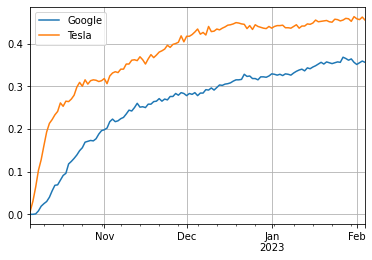

In [24]:
ps_tsla = bs_tsla.mean(axis=1)
ps_googl = bs_googl.mean(axis=1)
ps_googl.plot(grid=True, label="Google")
ps_tsla.plot(grid=True, label="Tesla") 
plt.legend()

#### Extra <font size='1'>(10 puntos)</font>

Utiliza el rendimiento logarítimico y compara los resultados.

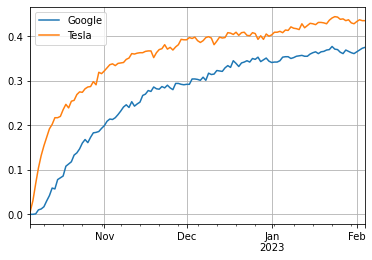

In [25]:
rl = np.log(data/data.shift())
rl=(np.log(data)-np.log(data.shift())).dropna()
from datetime import datetime, timedelta
def sim_rl(media, std, inicio, final, N) :
    fi=inicio
    ff=final
    fechai = datetime.strptime(fi, "%Y-%m-%d")
    fechaf = datetime.strptime(ff, "%Y-%m-%d")
    dias = (fechaf - fechai) / timedelta(days=1)
    fechas=pd.date_range(inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=np.random.normal(media,std,(int(dias),N)))

rl1 = (data1- data1.shift())/(data1.shift())
rl1 = np.log(data1/data1.shift()).dropna()
rlmedia_tsla = rl1.mean()
rlstd_tsla = rl1.std()
rl_simulados1= sim_rl(rlmedia_tsla, rlstd_tsla, "2022-10-05","2023-02-05", 1000)

rl2 = (data2- data2.shift())/(data2.shift())
rl2 = np.log(data2/data2.shift()).dropna()
rlmedia_googl = rl2.mean()
rlstd_googl = rl2.std()
rl_simulados2= sim_rl(rlmedia_googl, rlstd_googl, "2022-10-05","2023-02-05", 1000)

rlvalor_deseado1 = data1[-1]*1.10
rlretorno = (1+rl_simulados1).cumprod()*data1[-1]
rlbs_tsla = rlretorno >= rlvalor_deseado1
rlvalor_deseado2 = data2[-1]*1.10
rlretorno2 = (1+ rl_simulados2).cumprod()*data2[-1]
rlbs_googl = rlretorno2 >= rlvalor_deseado2
rlps_tsla = rlbs_tsla.mean(axis=1)
rlps_googl = rlbs_googl.mean(axis=1)
rlps_googl.plot(grid=True, label="Google") #Azul
rlps_tsla.plot(grid=True, label="Tesla") #Naranja
plt.legend()

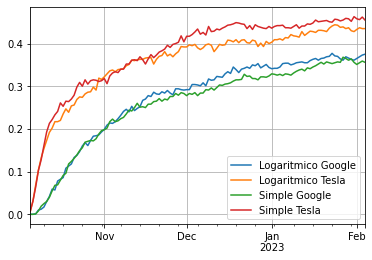

In [27]:
rlps_googl.plot(grid=True, label="Logaritmico Google")
rlps_tsla.plot(grid=True, label="Logaritmico Tesla") 
ps_googl.plot(grid=True, label="Simple Google") 
ps_tsla.plot(grid=True, label="Simple Tesla") 
plt.legend()

#### Se puede notar como es el ligero cambio entre el rendimientos simple y logaritmico, ya que el simple crea un marco comparable que permite la evaluación de las relaciones analíticas, además de que siempre que comparemos rendimientos para un mismo periodo de tiempo, no nos equivocaremos si usamos los rendimientos simples. En camio los logaritmicos; se reduce gratamente la complejidad algorítmica, ya que se podría aplicar el teorema central del límite y cuando el rendimiento es muy pequeño, si pensamos en operaciones de trading a corto plazo ese suele ser el caso, los retornos logarítmicos son aproximadamente iguales a los retornos simples.